Exploratory Data Analysis
===================

- In this video we'll go through a worked example of exploratory data analysis using data visualisation. 

## Preliminary setup

In [1]:
### Load Libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings # this allows us to better control warning messages

## Settings for the JupyterLab Notebook

In [2]:
# Set matplotlib to output plots without having to use plt.show()
%matplotlib inline 

# Set max row display
pd.set_option('display.max_row', 200)

# Set iPython's max column width to 60
pd.set_option('display.max_columns', 60)

# Use Seaborn Settings for all plots
sns.set()

# Do not print warning messages
warnings.simplefilter('ignore')

## Load data

- For this example we'll use the old workhorse of data analysis / data mining courses, the _iris_ dataset. This dataset, which dates back almost a century, relates to measurements of different flower dimensions in three species of plants of the genus _Iris_.

In [3]:
### Load Libraries
iris = sns.load_dataset("iris")
print(type(iris))
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- When we initially explore a dataset, it is usually a good idea to try and formulate a few questions, and only then develop some plots to investigate them (qualitatively at this point). But let's start by first getting a feel of the data:

In [4]:
# How many records do we have
iris['species'].count()

150

In [5]:
# How many records do we have in each category
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

- Let's start by ploting a scatter plot matrix of the features, as we saw in the last video:






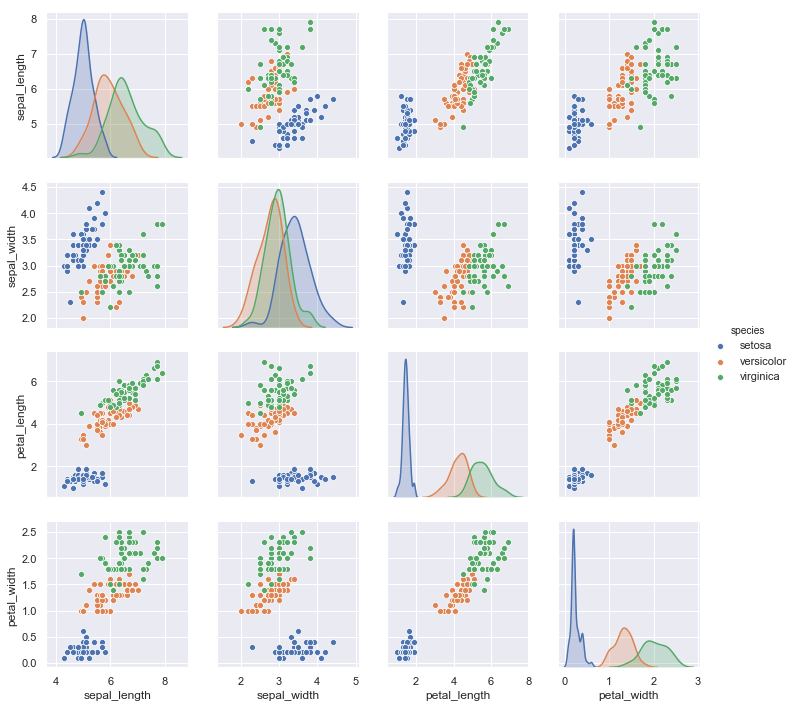

In [6]:
sns.pairplot(iris, hue = 'species', height = 2.5);

- This is a very informative plot. Notice, for instance, that while it is difficult to separate all three classes on any individual plot, the pair of attributes (*petal_width*, *petal_length*) does a perfect job at isolating the flowers from the _Setosa_ type, and a pretty decent job at separating the other two species. Let's zoom in on this particular pair of variables.

- We can use `Seaborn` to create a scatter plot with marginal histograms, which give us an idea of the frequencies for each value:

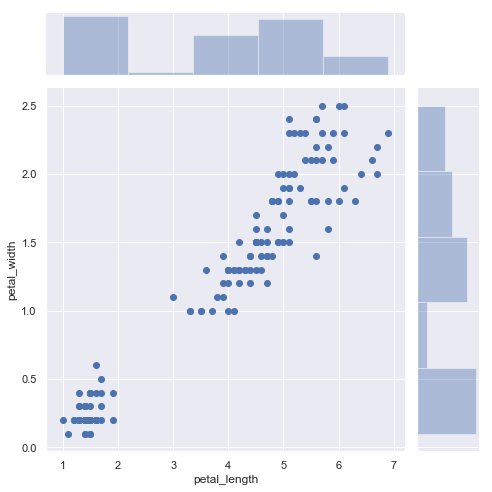

In [13]:
sns.jointplot(x = 'petal_length', y = 'petal_width', 
              data = iris, height = 7);

- It would also be helpful to see things by species. We can use Seaborn's facetgrid for this.

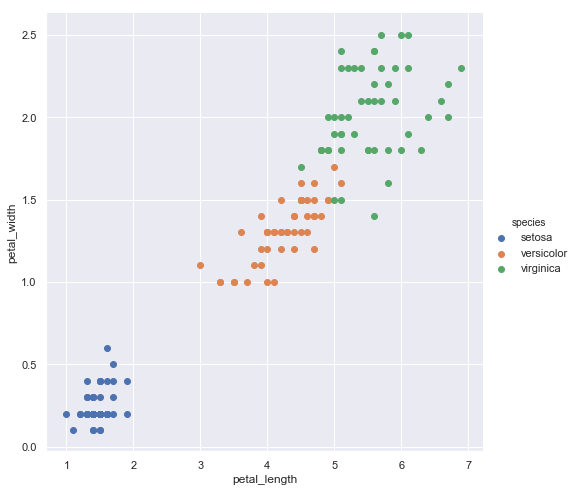

In [10]:
sns.FacetGrid(iris, hue = 'species', height = 7) \
    .map(plt.scatter, 'petal_length', 'petal_width') \
    .add_legend();

- We can also look at boxplots to look at individual features.

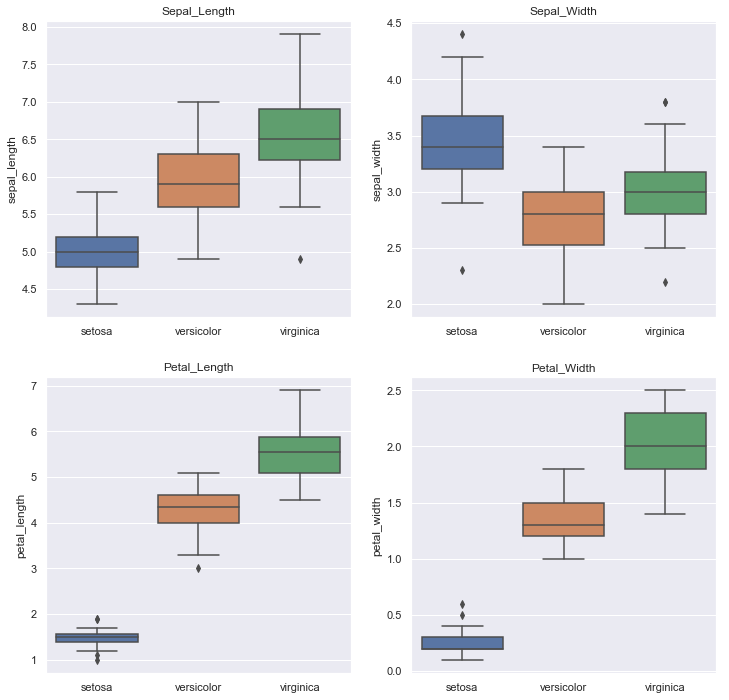

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

for ax, var in zip(axes.flatten(), iris.columns.values):
    sns.boxplot(ax = ax,
                x = 'species', y = var, 
                data = iris);
    ax.set(title = var.title(), xlabel = None);

# Pandas DataFrames have a boxplot method, but it doesn't look nearly as nice. 
# Try iris.boxplot(by = 'species', figsize = (12, 12));

- One way we can extend these plots is adding a layer of individual points on top of it through `Seaborn`'s striplot or swarmplot
 
- We'll use jittering to reduce overplotting, and transparency to improve visualisation

- Attributing the resulting plot to the same axes object causes the plots to be superimposed

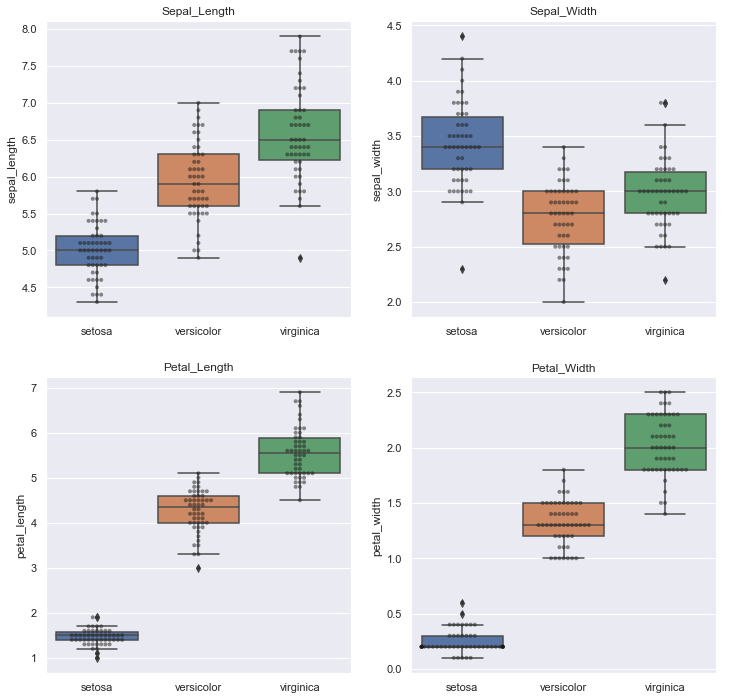

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

for ax, var in zip(axes.flatten(), iris.columns.values):
    sns.boxplot(ax = ax, data = iris,
                x = 'species', y = var);
    sns.swarmplot(ax = ax, data = iris, 
                  x = 'species', y = var, 
                  edgecolor = 'k', alpha = 0.5, 
                  color = 'k', size = 4)
    ax.set(title = var.title(), xlabel = None);

- A violin plot is also an interesting alternative to the boxplot, as it uses a density estimator to illustrate the general distribution of the data. In a sense it combines the benefits of the previous two plots and simplifies them.

- Denser regions of the data are fatter, and sparser thiner in a violin plot

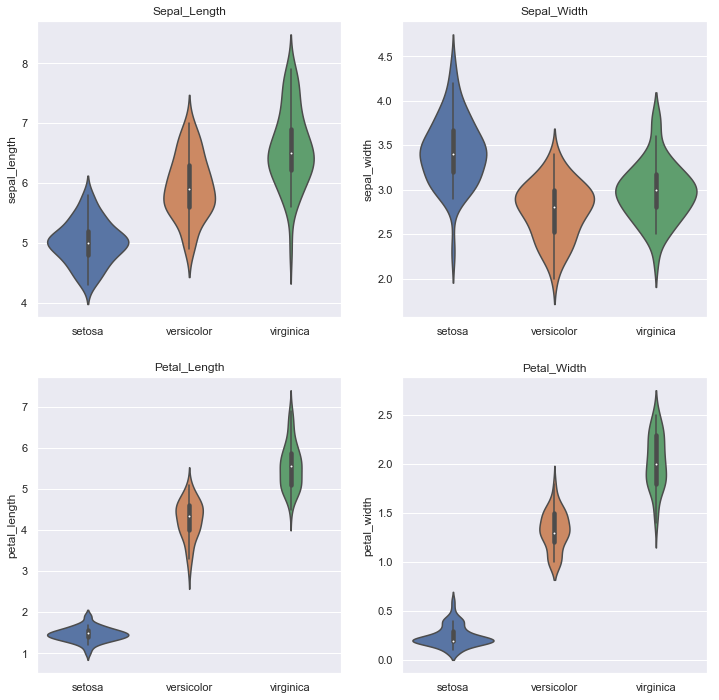

In [16]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

for ax, var in zip(axes.flatten(), iris.columns.values):
    sns.violinplot(ax = ax, data = iris, 
                   x = 'species', y = var, 
                   size = 6)
    ax.set(title = var.title(), xlabel = None);

- And of course we can combine violin plots with swarmplots if we want:

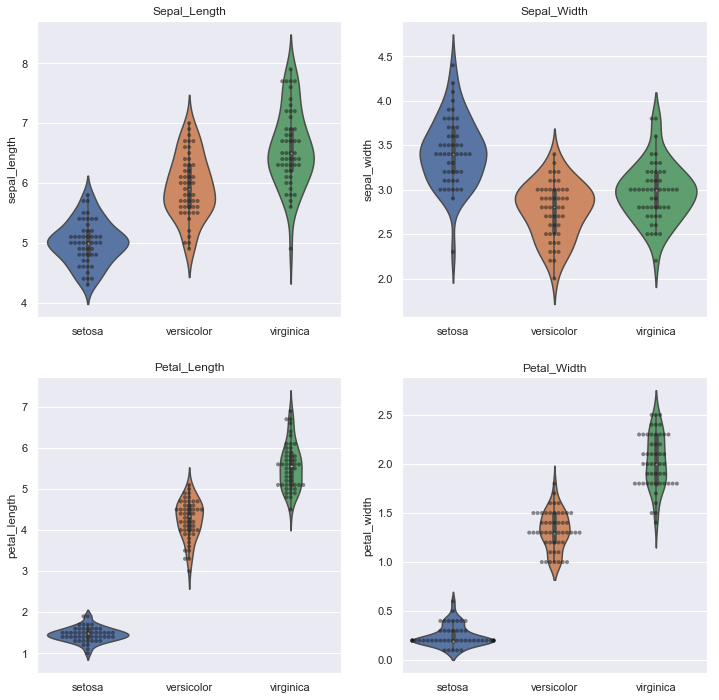

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

for ax, var in zip(axes.flatten(), iris.columns.values):
    sns.violinplot(ax = ax, data = iris, 
                   x = 'species', y = var, 
                   size = 6)
    sns.swarmplot(ax = ax, data = iris, 
                  x = 'species', y = var, 
                  edgecolor = 'k', alpha = 0.5, 
                  color = 'k', size = 4)
    ax.set(title = var.title(), xlabel = None);

## Wrapping up

- There are, of course, tens of other exploratory plots that could be employed to investigate this particular data set. The point here is to provide some examples of what is possible. 

- In preliminary data analyses the objectives are usually twofold:

    - To investigate the sanity of the data, i.e., to check for outliers, missing values, or any problems with the data that may unnecessarily complicate or jeopardise posterior analyses
    
    - To get a feel for the data and formulate some hypotheses regarding the relationships between variables.